In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Exploring and preprocessing dataset

In [225]:
data = pd.read_csv(r'data\Student data.csv')
adjusted_data = data[23:]
column_names = ['1st Term GPA', '2nd Term GPA', 'First Language', 'Funding', 'School', 'Fast Track', 'Coop',
                'Residency', 'Gender', 'Prev Education', 'Age Group', 'High School Average Mark', 'Math Score',
                'English Grade', 'FirstYearPersistence']
adjusted_data.columns = column_names

# Convert the data types of the columns to the appropriate types

#* Numeric columns

numeric_columns = ['1st Term GPA', '2nd Term GPA', 'High School Average Mark', 'Math Score']

cat_columns = ['First Language', 'Funding', 'School', 'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education', 'Age Group', 'English Grade', 'FirstYearPersistence']

# Convert numeric columns to numeric, coercing errors to NaN
adjusted_data[numeric_columns] = adjusted_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to category type
adjusted_data[cat_columns] = adjusted_data[cat_columns].astype('category')

In [226]:
# Replace '?' with NaN
adjusted_data.replace('?', np.nan, inplace=True)

In [227]:
visualization =  adjusted_data.copy().reset_index()

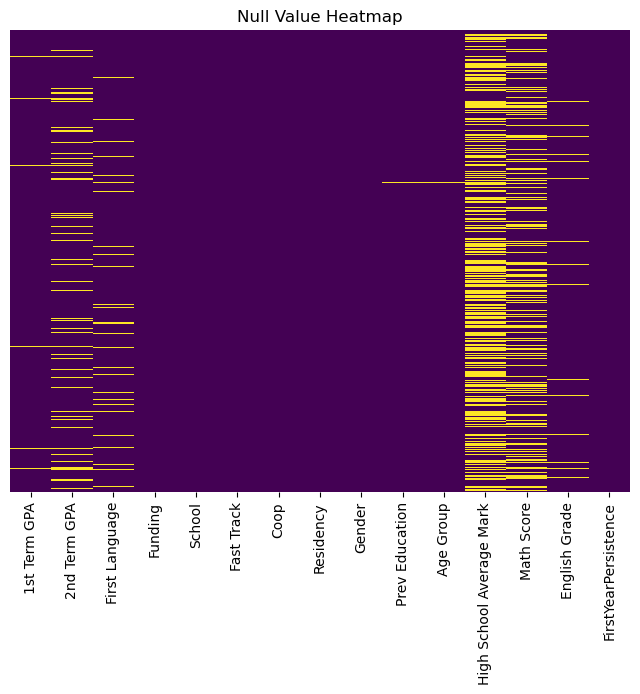

In [228]:
plt.figure(figsize=(8, 6))
sns.heatmap(adjusted_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Null Value Heatmap")
plt.show()

In [229]:
#mapping values for visualization

language_map = {"1":'English', "2":'French', "3":'Other'}
visualization['First Language'] = visualization['First Language'].map(language_map)

funding_map = {1:"Apprentice_PS" , 2: "GPOG_FT", 3:"Intl Offshore", 4: "Intl Regular", 5:"Intl Transfer", 6:"Joint Program Ryerson", 7:"Joint Program UTSC", 8:"Second Career Program", 9:"Work Safety Insurance Board"}
visualization['Funding'] = visualization['Funding'].map(funding_map)

fastrack_map = {1: "Yes", 2: "No"}
visualization['Fast Track'] = visualization['Fast Track'].map(fastrack_map)

coop_map = {1: "Yes", 2: "No"}
visualization['Coop'] = visualization['Coop'].map(coop_map)

residency_map = {1: "Domestic", 2: "International"}
visualization['Residency'] = visualization['Residency'].map(residency_map)

gender_map = {1: "Female", 2: "Male", 3:"Neutral"}
visualization['Gender'] = visualization['Gender'].map(gender_map)

prevEducation_map = {"1": "HighSchool", "2": "PostSecondary", "0":"0"}
visualization['Prev Education'] = visualization['Prev Education'].map(prevEducation_map)

age_map={"1":"0 to 18", "2": "19 to 20", "3": "21 to 25", "4":"26 to 30", 
         "5":"31 to 35" , "6":"36 to 40", "7": "41 to 50", "8":"51 to 60", "9": "61 to 65", "10":"66+"}
visualization['Age Group'] = visualization['Age Group'].map(age_map)


english_map={"1": "Level-130", "2": "Level-131", "3":"Level-140", "4":"Level-141", "5": "Level-150", "6": "Level-151",
  "7": "Level-160", "8":"Level-161", "9": "Level-170", "10": "Level-171", "11": "Level-180"}

visualization['English Grade'] = visualization['English Grade'].map(english_map)


In [230]:
visualization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     1437 non-null   int64   
 1   1st Term GPA              1420 non-null   float64 
 2   2nd Term GPA              1277 non-null   float64 
 3   First Language            1326 non-null   category
 4   Funding                   1437 non-null   category
 5   School                    1437 non-null   category
 6   Fast Track                1437 non-null   category
 7   Coop                      1437 non-null   category
 8   Residency                 1437 non-null   category
 9   Gender                    1437 non-null   category
 10  Prev Education            1433 non-null   category
 11  Age Group                 1433 non-null   category
 12  High School Average Mark  694 non-null    float64 
 13  Math Score                975 non-null    float6

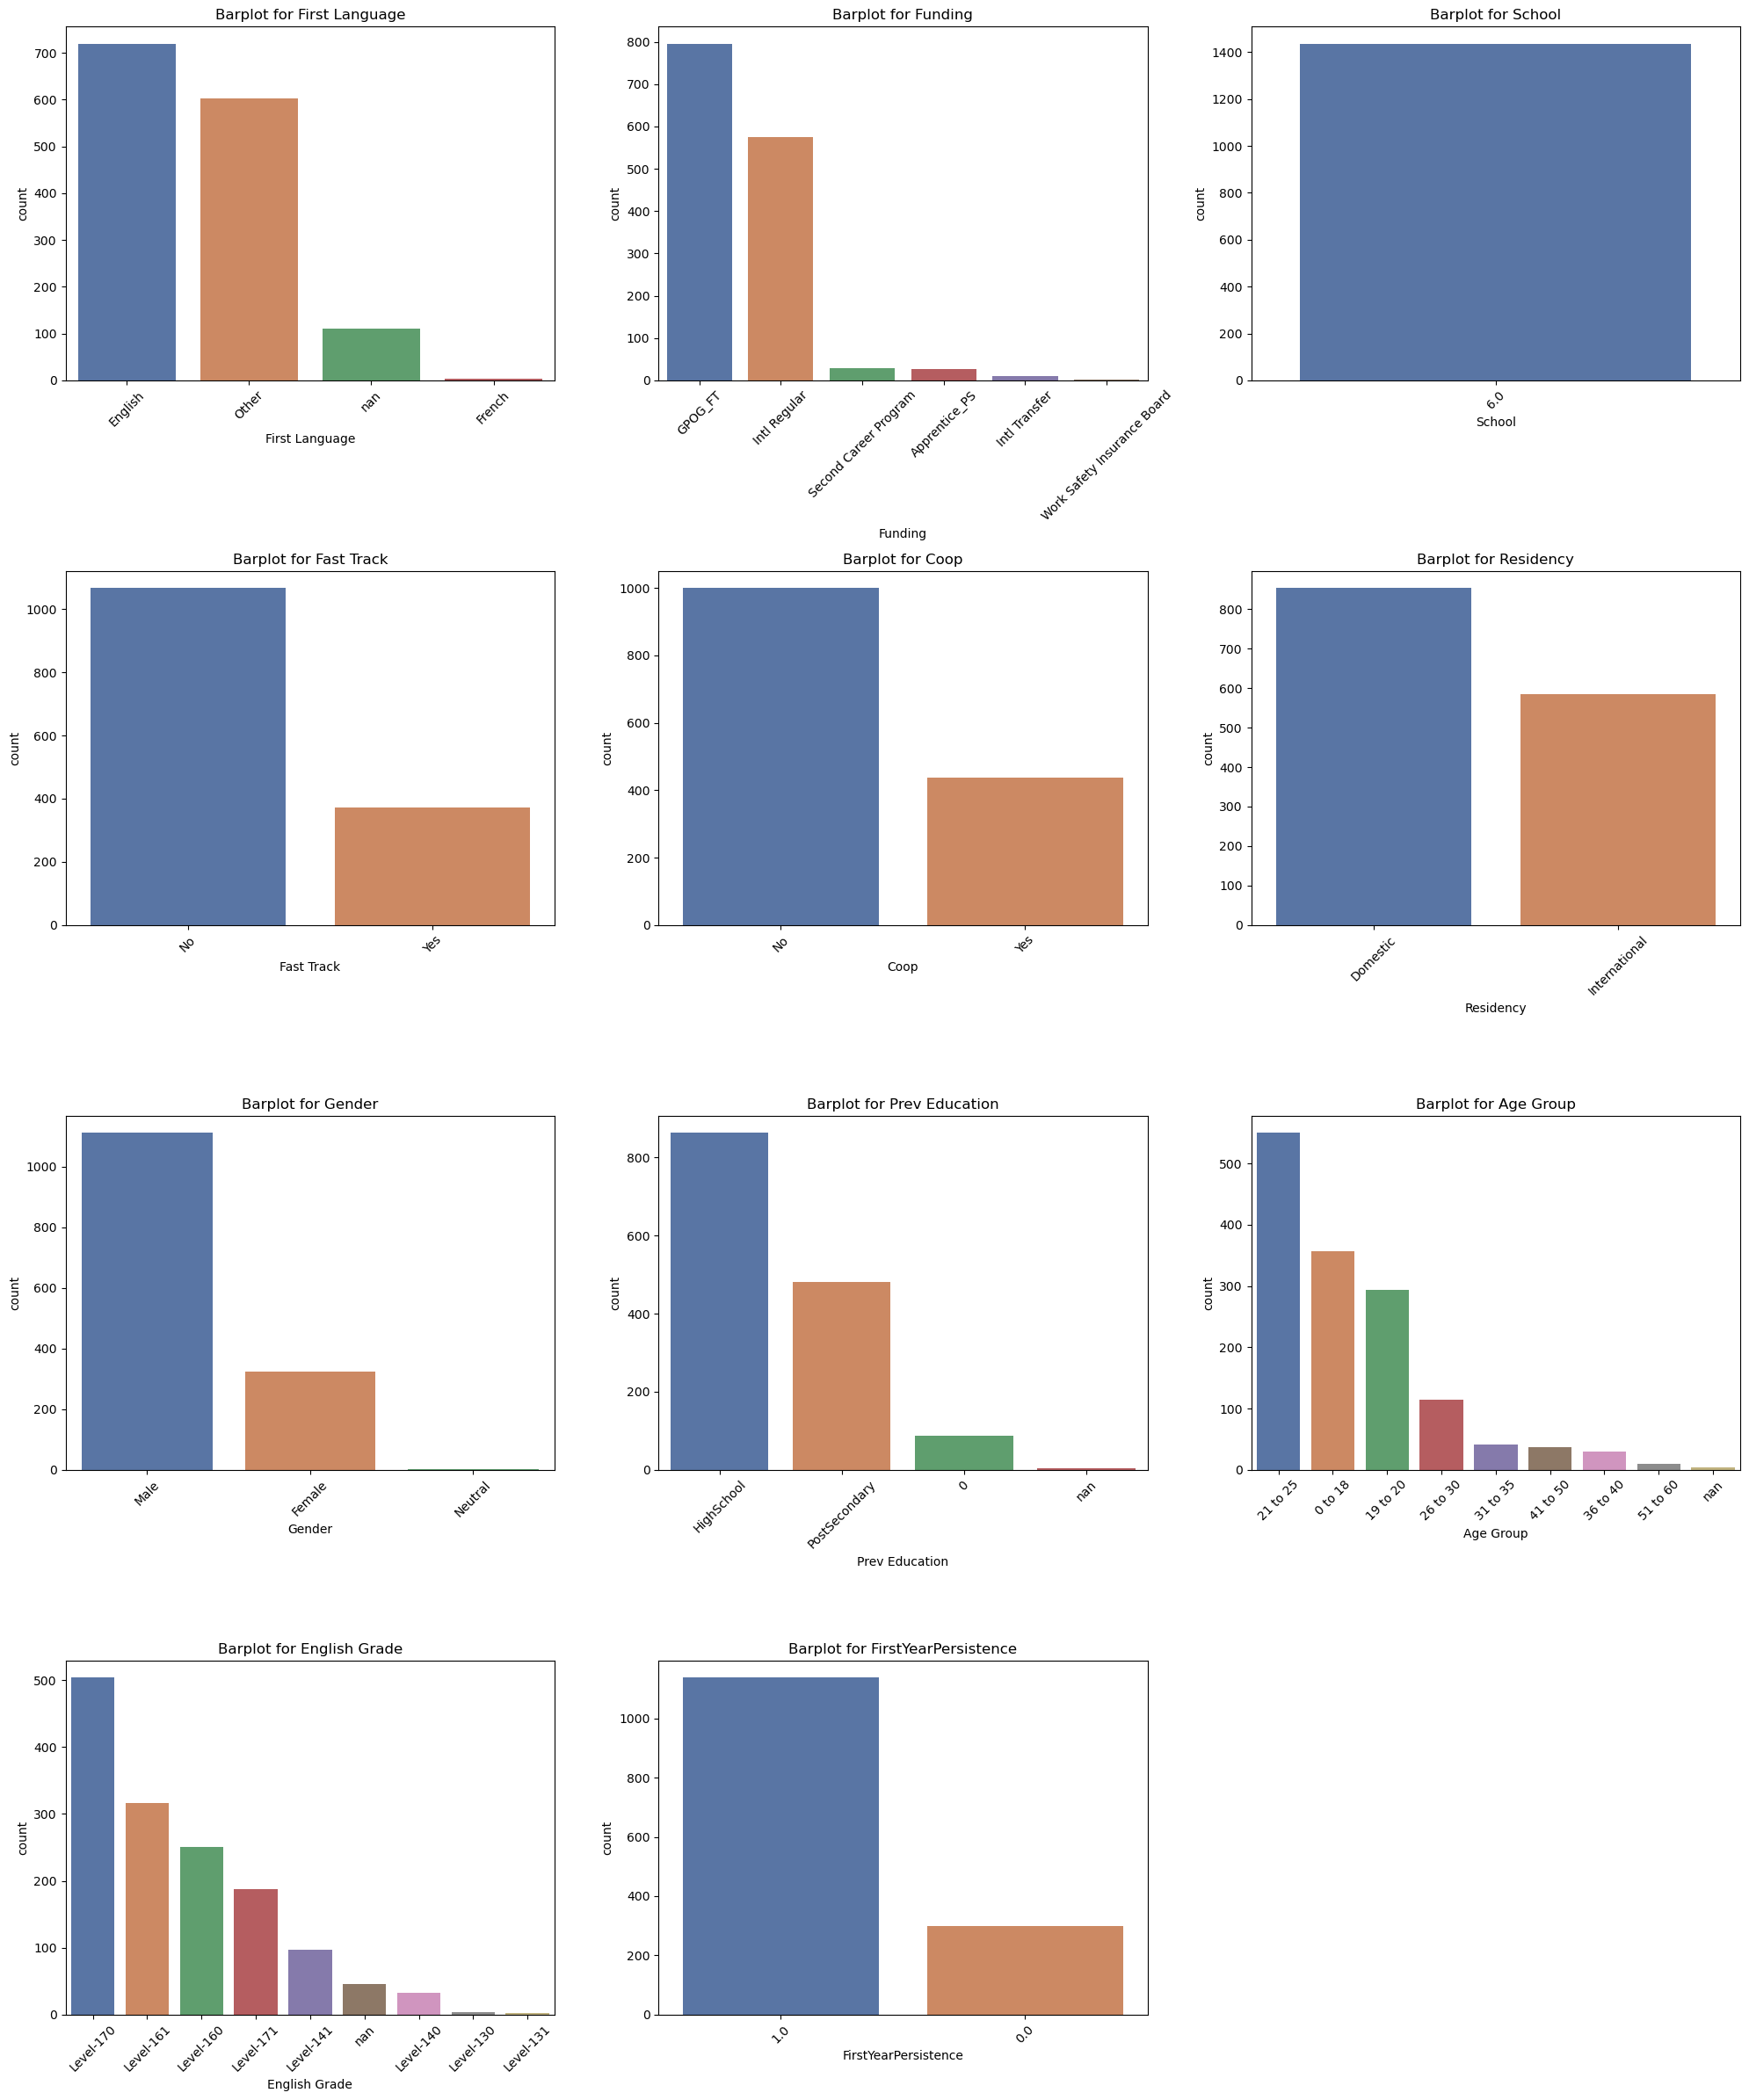

In [231]:
visualization[cat_columns] = visualization[cat_columns].astype(str)
cat_columns =visualization.select_dtypes(object).columns
cat_columns=cat_columns.to_list()


fig, axes = plt.subplots(4, 3, figsize=(20, 24))  # Adjust size for clarity

# Flatten axes for easy iteration
axes = axes.flatten()

for idx,i in enumerate(cat_columns):
    df = pd.DataFrame(visualization[i].value_counts()).reset_index()
    df.columns = [i, "count"]
 
    sns.barplot(df, x = i, y = "count", ax=axes[idx], palette = "deep")
    axes[idx].set_title(f"Barplot for {i}")
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    



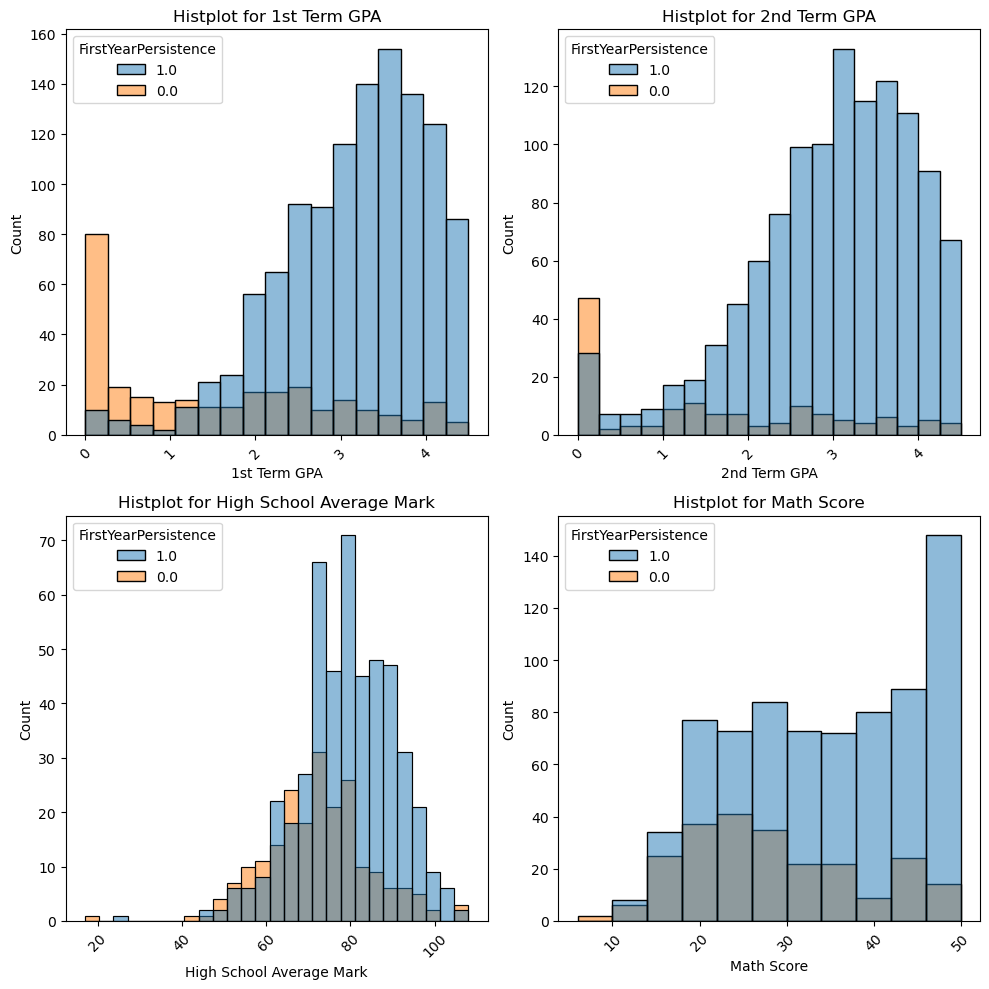

In [232]:
num_col=visualization.select_dtypes('Float64').columns.to_list()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Adjust size for clarity

# Flatten axes for easy iteration
axes = axes.flatten()

for idx,i in enumerate(num_col):
    sns.histplot(visualization, x = i, ax=axes[idx], hue ="FirstYearPersistence")
    axes[idx].set_title(f"Histplot for {i}")
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    




In [233]:
visualization = visualization.drop(columns='School')

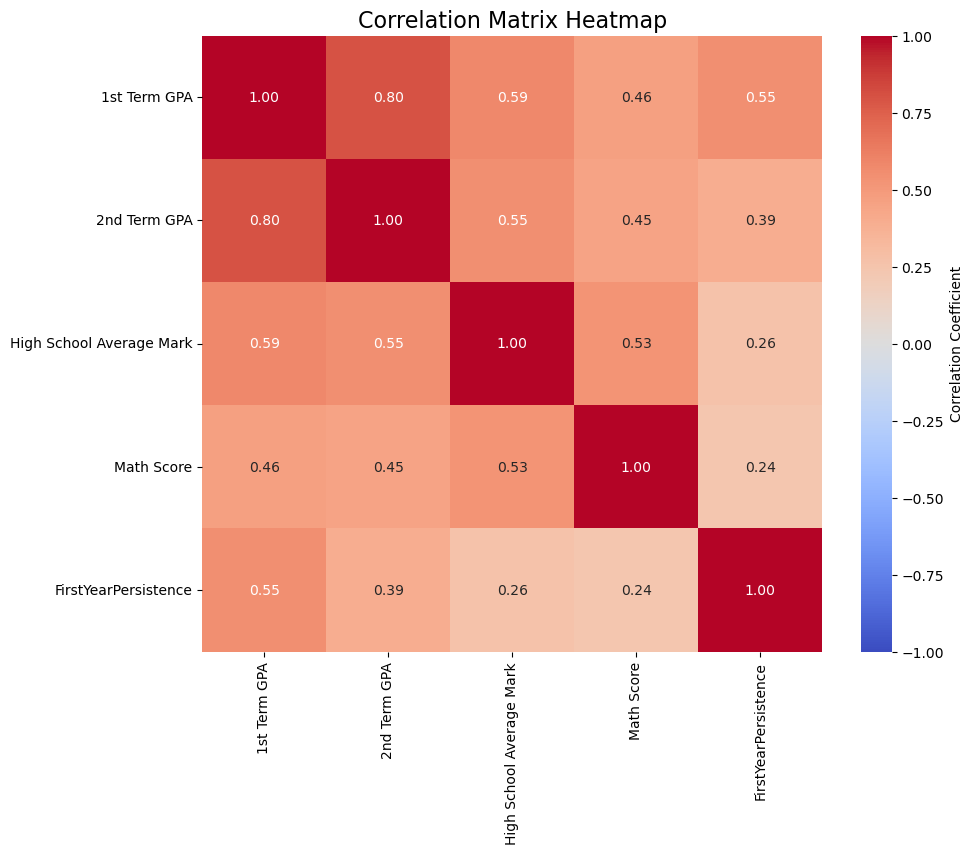

In [234]:
visualization['FirstYearPersistence']=visualization['FirstYearPersistence'].astype('float64')
vis_cor = visualization.select_dtypes('float64')
corr = vis_cor.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(
    corr, 
    annot=True,  
    fmt=".2f",   
    cmap="coolwarm", 
    vmin=-1, vmax=1,  
    cbar_kws={'label': 'Correlation Coefficient',
    },annot_kws={"size": 10}
)


plt.title("Correlation Matrix Heatmap", fontsize=16)

plt.show()